<a href="https://colab.research.google.com/github/juliraman/mymodels/blob/master/Proyeccion_Powwi_Mi_Cuenta_Su_Red.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Modelo ARIMA para la proyección de usuarios tarjeta - Mi Cuenta (Powwi Ágil) / Su Red App

<b>Objetivo</b>: a partir del requerimiento realizado <b> pronosticar la cantidad de usuarios de la modalidad de pago "Mi Cuenta" (Powwi ágil) en el <i>app</i> Su Red para los siguientes meses </b>, con miras al ofrecimiento de tarjetas.

<h6>Paso 1: Importación de datos

La base de datos de este análisis se comparte anexa a este notebook

In [ ]:
datapowwi <- read.csv2("~/Documents/SURED/serieproyeccionpowwi/info_fechas_mi_cuenta.csv")
datapowwi
library('ggplot2')


fecha,registrados_totales,cantidad_mi_cuenta,registrados_acumulados_totales,mi_cuenta_acumulados,porc,X..MC.reg
07/01/2021,174,13,174,13,0.074712644,"0,074712644"
07/02/2021,150,8,324,21,0.024691358,"0,053333333"
07/03/2021,119,6,443,27,0.013544018,"0,050420168"
07/04/2021,99,3,542,30,0.005535055,"0,03030303"
07/05/2021,102,4,644,34,0.006211180,"0,039215686"
07/06/2021,205,8,849,42,0.009422850,"0,03902439"
07/07/2021,157,12,1006,54,0.011928429,"0,076433121"
07/08/2021,192,9,1198,63,0.007512521,"0,046875"
07/09/2021,178,8,1376,71,0.005813953,"0,04494382"
07/10/2021,107,4,1483,75,0.002697235,"0,037383178"


Se presenta a continuación un gráfico que permite evidenciar el comportamiento diario del número de usuarios que utilizaron la opción "Mi Cuenta" para realizar retiros de Powwi desde el App Su Red. Estos datos fueron seleccionados desde el 1º de julio de 2021. En total, se incluyeron 390 observaciones diarias.

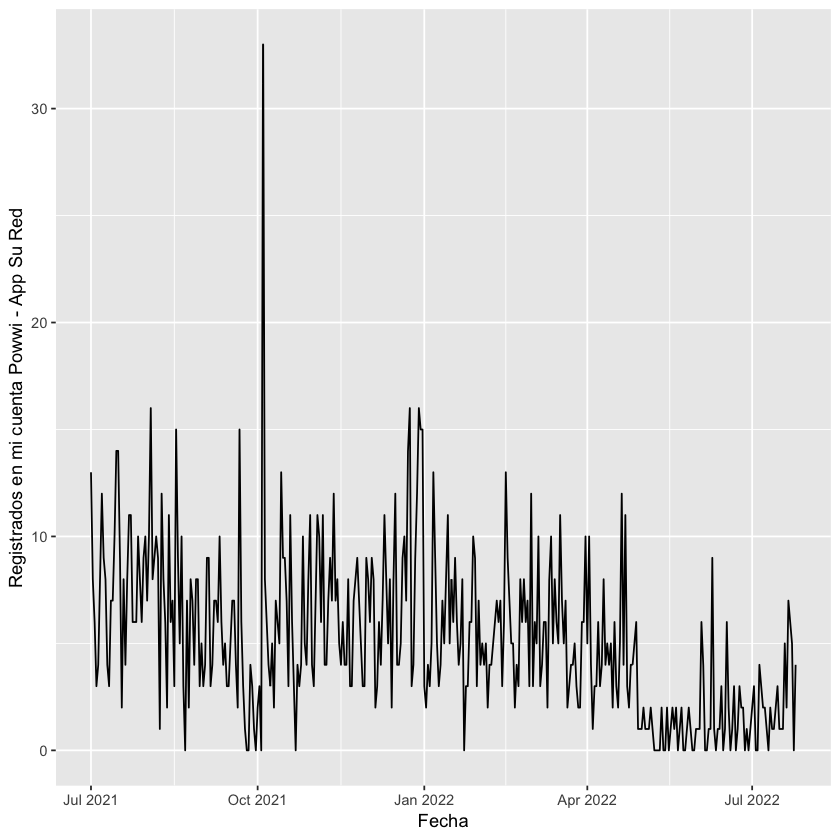

In [ ]:
library(tseries)
library(forecast)
datapowwi$fecha=as.Date(datapowwi$fecha,'%m/%d/%Y')
ggplot(datapowwi, aes(fecha,cantidad_mi_cuenta)) + geom_line() + scale_x_date('Fecha') + ylab("Registrados en mi cuenta Powwi - App Su Red") + xlab("")

Como se puede apreciar, la serie no manifiesta un componente de tendencia para el periodo considerado. Se evidencia que desde febrero de 2022 el numero de registros fue bajo en comparación al pasado, tendiendo a disminuir aún más después de mayo de 2022. De igual forma, algunas fechas como las de las primeras semanas de octubre permiten apreciar un comportamiento atípico registrando cifras por encima de los 35 retiros en el dia. Para contar con un pronóstico acertado es necesario realizar tratamiento a los valores atípicos, obteniendo la serie que se presenta a continuación

Don't know how to automatically pick scale for object of type ts. Defaulting to continuous.


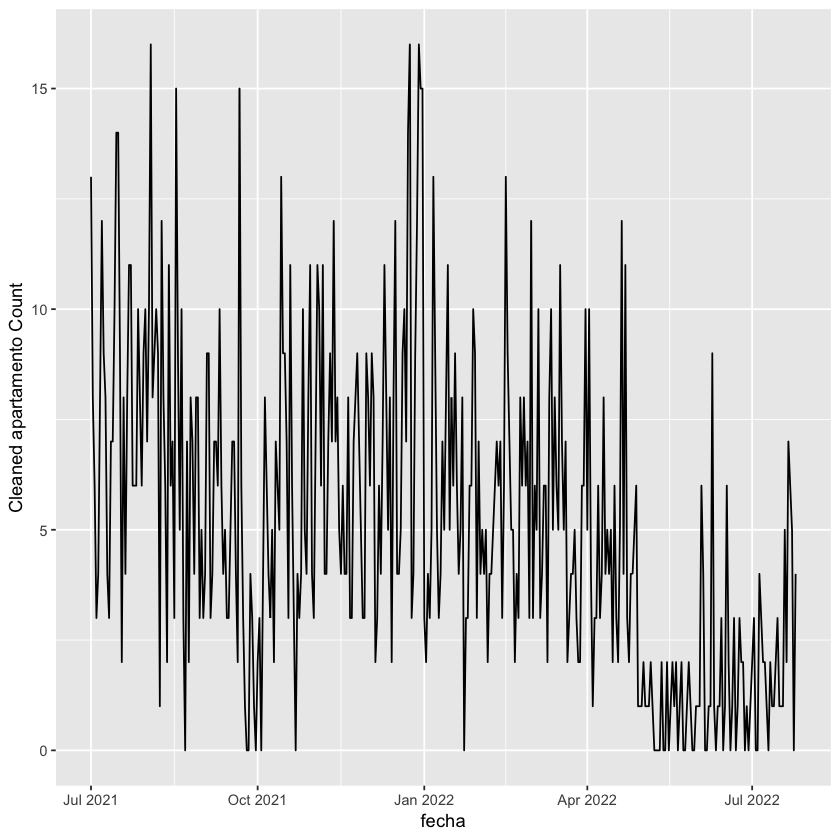

In [ ]:
count_ts = ts(datapowwi[, c('cantidad_mi_cuenta')])
datapowwi$clean_micuenta = tsclean(count_ts)
ggplot() + geom_line(data = datapowwi, aes(x = fecha, y = clean_micuenta)) + ylab('Cleaned apartamento Count')

El comportamiento descriptivo de la serie y el conocimiento histórico del producto permiten encontrar una posible estacionalidad, que se puede presentar en periodos quincenales. Una forma adecuada para suavizar el comportamiento de la serie es utilizar los promedios móviles, en este caso de manera semanal. La gráfica siguiente muestra un comparativo entre la media móvil obtenida por semana contra la serie a la que fueron tratados los valores atípicos.

Don't know how to automatically pick scale for object of type ts. Defaulting to continuous.
Warning message:
“Removed 6 rows containing missing values (geom_path).”

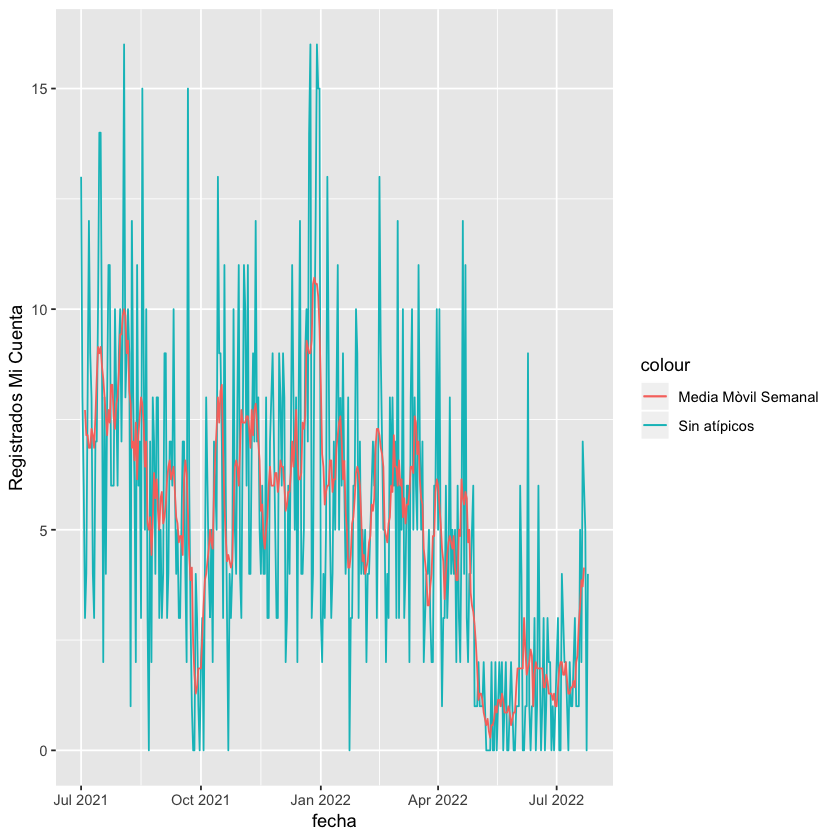

In [ ]:
datapowwi$micuenta_ma = ma(datapowwi$clean_micuenta, order=7) 
datapowwi$micuenta_ma30 = ma(datapowwi$clean_micuenta, order=30)
ggplot() +
  geom_line(data = datapowwi, aes(x = fecha, y = clean_micuenta, colour = "Sin atípicos")) +
  geom_line(data = datapowwi, aes(x = fecha, y = micuenta_ma,   colour = "Media Mòvil Semanal"))  +
  ylab('Registrados Mi Cuenta')

Con la serie aqui construida, se realiza un análisis de descomposición espectral, el cual permite identificar la presencia de distintos componentes en la serie, como son la tendencia, la estacionalidad, los ciclos y la irregularidad. Este resultado nos permite entender lo siguiente: la serie es irregular, pero presenta un componente estacional fuerte en periodos de 7 días, siendo el intervalo de 14 días aquel que marca puntos más pronunciados (como muestra la gráfica "seasonal", segunda en la parte inferior). También podemos ver que no hay un tendencia clara y, por adición, que la seríe en la última gráfica presenta ciclos con mayor fuerza cada siete días, ratificando lo hallado en la gráfica de estacionalidad

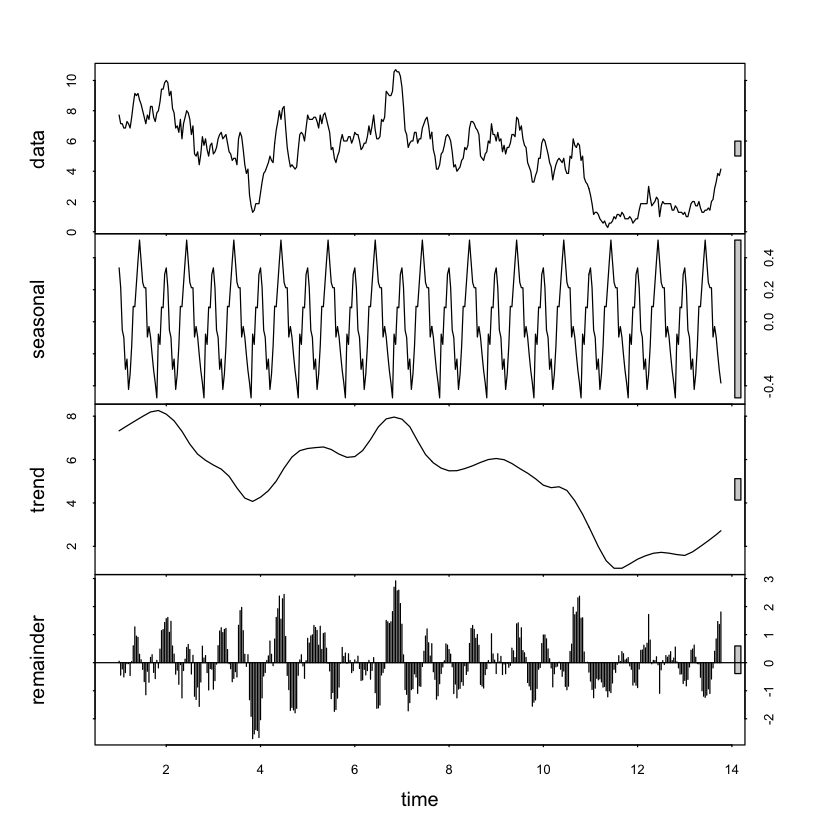

In [ ]:
count_ma = ts(na.omit(datapowwi$micuenta_ma), frequency=30)
decomp = stl(count_ma, s.window="periodic")
deseasonal_micuenta <- seasadj(decomp)
plot(decomp)


Con este resultado, se construyen diagramas de autocorrelación y autocorrelación parcial. Estos diagramas reflejan que la serie cumple el supuesto de estacionariedad (prueba de Dickey Fuller) la cual nos indica que podemos usar modelos ARIMA para proyectar la serie. También vemos en los diagramas la fuerza que tiene la autocorrelación del periodo 7, que nos muestra con énfasis el pico de forma semanal, lo que ratifica la elección de la serie y nos da intuición del modelo a emplear

Warning message in adf.test(count_d1, alternative = "stationary"):
“p-value smaller than printed p-value”


	Augmented Dickey-Fuller Test

data:  count_d1
Dickey-Fuller = -8.5762, Lag order = 7, p-value = 0.01
alternative hypothesis: stationary


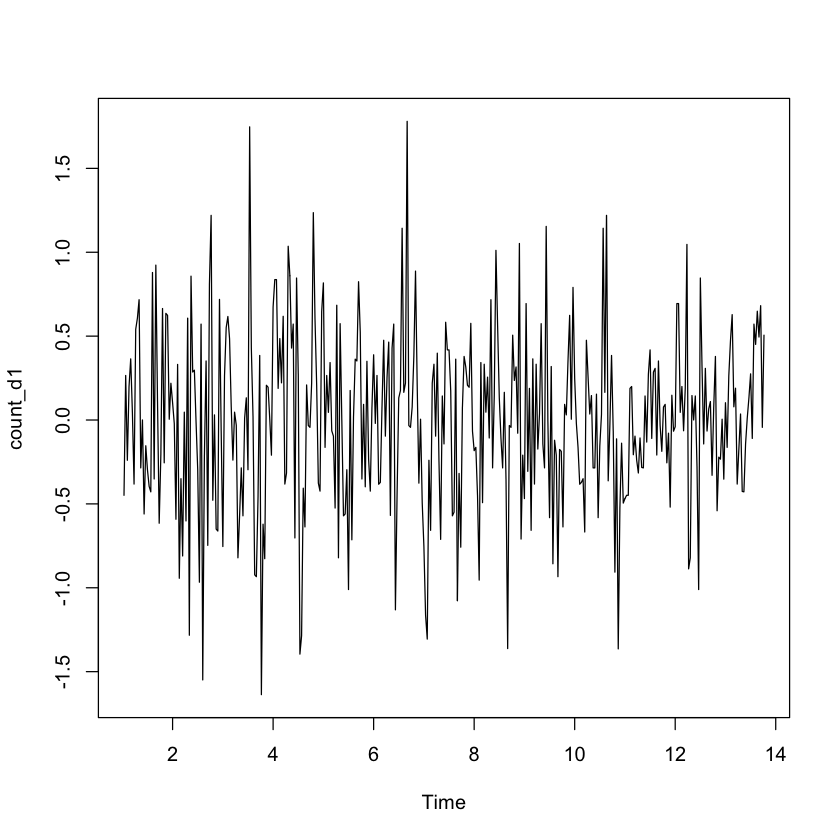

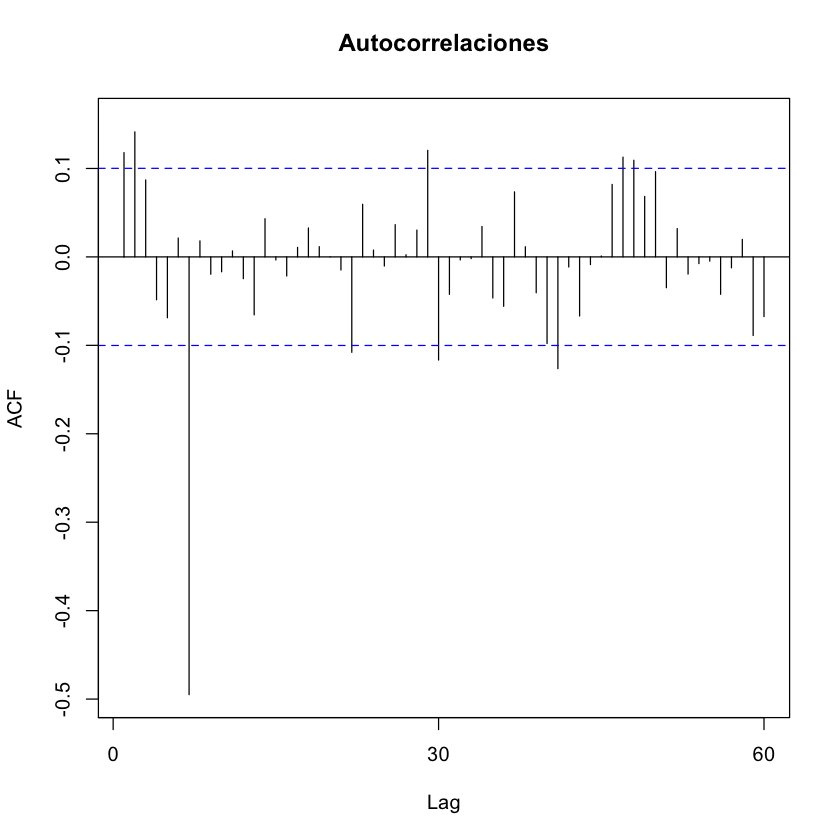

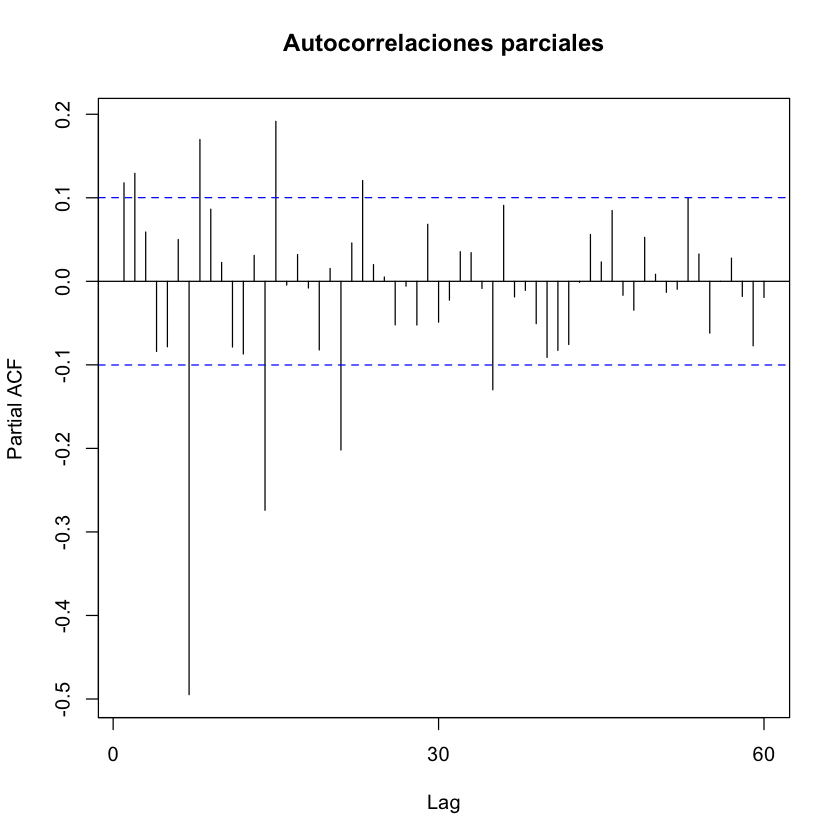

In [ ]:
count_d1 = diff(deseasonal_micuenta, differences = 1)
plot(count_d1)
adf.test(count_d1, alternative = "stationary")
Acf(count_d1, main='Autocorrelaciones')
Pacf(count_d1, main='Autocorrelaciones parciales')

Dado lo anterior, para emplear modelos ARIMA podemos encontrar dos rutas: (1) emplear un algoritmo automatizado que identifique un modelo candidato y (2) utilizar un modelo basado en las intuiciones generadas por los diagramas de autocorrelación. En este caso, se ejecuta el primer modelo (llamado <i>modeloarimapowwi</i>) que muestra un resultado sugerido de un modelo ARIMA(2,1,0) con buenos indicadores de ajuste.

In [ ]:
modeloarimapowwi<-auto.arima(deseasonal_micuenta, seasonal=FALSE)
modeloarimapowwi

Series: deseasonal_micuenta 
ARIMA(2,1,0) 

Coefficients:
         ar1     ar2
      0.1027  0.1292
s.e.  0.0507  0.0507

sigma^2 estimated as 0.2693:  log likelihood=-291.26
AIC=588.51   AICc=588.58   BIC=600.36

Ahora se presenta el modelo 2, el cual se basa en las autocorrelaciones, en tal caso, elegimos un modelo ARIMA(7,1,0). El modelo nos muestra un resultado menor en el ajuste, pero con unos coeficientes significativos (en especial para la predicción semanal)

In [ ]:
modelo_arima_fit <- arima(deseasonal_micuenta, order=c(7,1,0),seasonal = list(order = c(1,0,0)), method="ML")
modelo_arima_fit



Call:
arima(x = deseasonal_micuenta, order = c(7, 1, 0), seasonal = list(order = c(1, 
    0, 0)), method = "ML")

Coefficients:
         ar1     ar2     ar3      ar4      ar5     ar6      ar7     sar1
      0.1297  0.1007  0.0346  -0.0405  -0.0237  0.0980  -0.4922  -0.1219
s.e.  0.0444  0.0445  0.0447   0.0447   0.0449  0.0444   0.0442   0.0519

sigma^2 estimated as 0.1942:  log likelihood = -230.87,  aic = 479.75

Con los dos modelos obtenidos, queda ahora evaluar su capacidad predictiva. En este caso, se somete primero a prueba el modelo 1 (modeloarimapowwi), con una proyección a 180 días. Como se aprecia en la gráfica el modelo no tiene buena capacidad predictiva puesto que realiza un pronóstico lineal que se estabiliza en 5 cuentas diarias

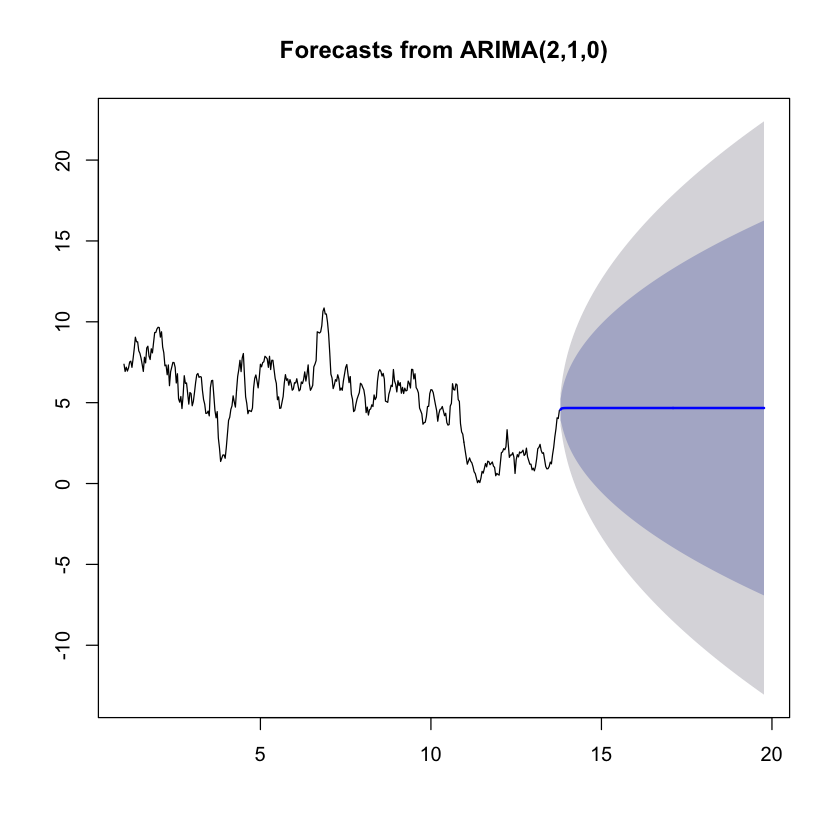

In [ ]:
prediccion <- forecast(modeloarimapowwi, h=180)
plot(prediccion)

Ahora, el segundo modelo genera un gráfico de predicción que muestra una mejor capacidad predictiva, pero ajustada a solamente 30 días por un aumento significativo de la variabilidad. Este modelo representa mejor capacidad predictiva y puede ser empleado en este horizonte para la proyección deseada

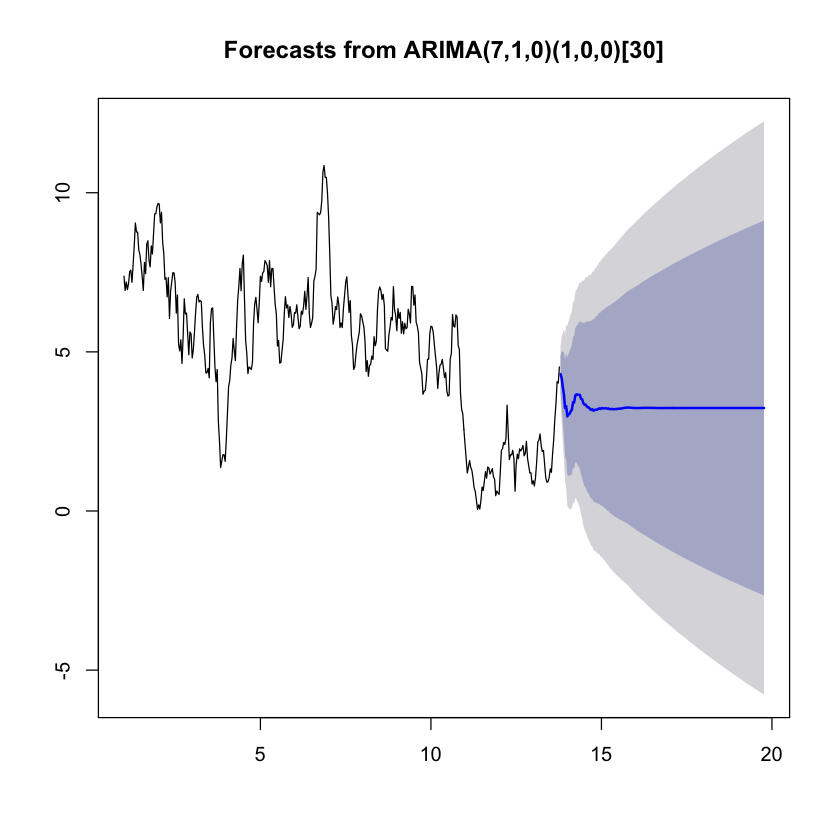

In [ ]:
prediccion <- forecast(modelo_arima_fit, h=180)
plot(prediccion)

En consideración a lo analizado, se elige el modelo 2 (ARIMA(7,1,0)) y se emplea para calcular las predicciones requeridas. Estas salidas se encuentran en el excel de resultados anexo, y son explicados también en la presentación adjunta